# Pre-processed Data: Managing Missing Values

To handle missing values in the dataset, you can use the following Python code:

# Data Cleaning :
Clean useless columns

In [9]:
import pandas as pd
import os

file1 = os.path.join("datasets", 'general_data.csv')
df1 = pd.read_csv(file1)
file2 = os.path.join("datasets", 'employee_survey_data.csv')
df2 = pd.read_csv(file2)
file3 = os.path.join("datasets", 'manager_survey_data.csv')
df3 = pd.read_csv(file3)

def delete_columns(df1):
    delete_columns = ['EmployeeCount', 'Over18']  # columns to delete
    existing_columns = [col for col in delete_columns if col in df1.columns]
    return df1.drop(columns=existing_columns)


Transform non-numerical to numercial data :

In [10]:
def non_numerical_columns(df1):
    df1['Attrition'] = df1['Attrition'].map({'Yes': 1, 'No': 0, 0:0, 1:1})
    df1['BusinessTravel'] = df1['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2, 0:0, 1:1, 2:2})
    df1['Department'] = df1['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2, 0:0, 1:1, 2:2})
    df1['EducationField'] = df1['EducationField'].map({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5, 0:0, 1:1, 2:2, 3:3, 4:4, 5:5})
    df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1, 0:0, 1:1})
    df1['JobRole'] = df1['JobRole'].map({'Sales Executive': 0, 'Research Scientist': 1, 'Laboratory Technician': 2, 'Manufacturing Director': 3, 'Healthcare Representative': 4, 'Manager': 5, 'Sales Representative': 6, 'Research Director': 7, 'Human Resources': 8, 0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8})
    df1['MaritalStatus'] = df1['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 0:0, 1:1, 2:2})
    return df1

Merge theses two codes

In [11]:
import pandas as pd
import os

def test_non_numerical_columns(df1):
    df1 = delete_columns(df1)
    df1 = non_numerical_columns(df1)
    print(df1.info())
    return df1

df1 = test_non_numerical_columns(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   int64  
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   int64  
 11  MaritalStatus            4410 non-null   int64  
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

# Categorization data to complet whole in data : Mode
Check the data missing

In [12]:
import pandas as pd
import os

for col in df1.columns:
    print(f"Columns: {col}, Missing Values: {df1[col].isna().sum()} ,rate of missing values: {round(df1[col].isna().sum()/len(df1[col])*100,2)}%") # print the number of missing values for each column



Columns: Age, Missing Values: 0 ,rate of missing values: 0.0%
Columns: Attrition, Missing Values: 0 ,rate of missing values: 0.0%
Columns: BusinessTravel, Missing Values: 0 ,rate of missing values: 0.0%
Columns: Department, Missing Values: 0 ,rate of missing values: 0.0%
Columns: DistanceFromHome, Missing Values: 0 ,rate of missing values: 0.0%
Columns: Education, Missing Values: 0 ,rate of missing values: 0.0%
Columns: EducationField, Missing Values: 0 ,rate of missing values: 0.0%
Columns: EmployeeID, Missing Values: 0 ,rate of missing values: 0.0%
Columns: Gender, Missing Values: 0 ,rate of missing values: 0.0%
Columns: JobLevel, Missing Values: 0 ,rate of missing values: 0.0%
Columns: JobRole, Missing Values: 0 ,rate of missing values: 0.0%
Columns: MaritalStatus, Missing Values: 0 ,rate of missing values: 0.0%
Columns: MonthlyIncome, Missing Values: 0 ,rate of missing values: 0.0%
Columns: NumCompaniesWorked, Missing Values: 19 ,rate of missing values: 0.43%
Columns: PercentSalary

Delete the columns if 40% of missing value, and filled missing value.

In [13]:
import pandas as pd

def fill_missing_columns(df1):
    # Suppression of columns with more than 40% missing values
    missing_percentage = df1.isna().sum() / len(df1)
    columns_to_drop = missing_percentage[missing_percentage > 0.4].index
    print(f"Colonnes supprimées (plus de {0.4*100}% de valeurs manquantes) : {list(columns_to_drop)}")
    df1 = df1.drop(columns=columns_to_drop)

    # Replace missing values with the mode
    for column in df1.columns:
        if df1[column].isnull().sum() > 0:  # Verfie if there are missing values
            mode_value = df1[column].mode()[0]  # Get the mode
            df1[column].fillna(mode_value, inplace=True)  # Replace missing values with the mode
    return df1


Test

In [14]:
import pandas as pd

def Print_clean_df1(df1):
    df1 = fill_missing_columns(df1)
    pd.set_option('display.max_rows', None)  # Print all rows
    pd.set_option('display.max_columns', None)  # Print all columns

    # Print the first 5 rows of the dataframe
    print(df1.head())
    return df1

df1 = Print_clean_df1(df1)

Colonnes supprimées (plus de 40.0% de valeurs manquantes) : []
   Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   51          0               1           0                 6          2   
1   31          1               2           1                10          1   
2   32          0               2           1                17          4   
3   38          0               0           1                 2          5   
4   32          0               1           1                10          1   

   EducationField  EmployeeID  Gender  JobLevel  JobRole  MaritalStatus  \
0               0           1       0         1        4              1   
1               0           2       0         1        1              0   
2               5           3       1         4        0              1   
3               0           4       1         3        8              1   
4               1           5       1         1        0              0   

   MonthlyIncome 

<ipython-input-13-a9304dfcab9d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].fillna(mode_value, inplace=True)  # Replace missing values with the mode


Cleaning employee_survey_data.csv

In [15]:
import pandas as pd
import os

for col in df2.columns:
    print(f"Colonne: {col}, Valeurs manquantes: {df2[col].isna().sum()} ,taux valeurs manquantes: {round(df2[col].isna().sum()/len(df2[col])*100,2)}%")



Colonne: EmployeeID, Valeurs manquantes: 0 ,taux valeurs manquantes: 0.0%
Colonne: EnvironmentSatisfaction, Valeurs manquantes: 25 ,taux valeurs manquantes: 0.57%
Colonne: JobSatisfaction, Valeurs manquantes: 20 ,taux valeurs manquantes: 0.45%
Colonne: WorkLifeBalance, Valeurs manquantes: 38 ,taux valeurs manquantes: 0.86%


In [16]:
import pandas as pd
import os

def Print_clean_df2(df2):
    df2 = fill_missing_columns(df2)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    for col in df2.columns:
        print(f"Colonne: {col}, Valeurs manquantes: {df2[col].isna().sum()} ,taux valeurs manquantes: {round(df2[col].isna().sum()/len(df2[col])*100,2)}%")
    return df2

df2 = Print_clean_df2(df2)


Colonnes supprimées (plus de 40.0% de valeurs manquantes) : []
Colonne: EmployeeID, Valeurs manquantes: 0 ,taux valeurs manquantes: 0.0%
Colonne: EnvironmentSatisfaction, Valeurs manquantes: 0 ,taux valeurs manquantes: 0.0%
Colonne: JobSatisfaction, Valeurs manquantes: 0 ,taux valeurs manquantes: 0.0%
Colonne: WorkLifeBalance, Valeurs manquantes: 0 ,taux valeurs manquantes: 0.0%


<ipython-input-13-a9304dfcab9d>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].fillna(mode_value, inplace=True)  # Replace missing values with the mode


Merge theses three data set

In [17]:

df1 = pd.merge(df1, df2, on="EmployeeID", how="left")
df1 = pd.merge(df1, df3, on="EmployeeID", how="left")

df1.to_csv("datasets/general_data_fusionne.csv", index=False)
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   int64  
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   int64  
 11  MaritalStatus            4410 non-null   int64  
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  PercentSalaryHike       

## import the CSV file for the in and out files for the in/out time

In [18]:
import pandas as pd
import os
import numpy as np

infilepath = os.path.join('datasets', 'in_time.csv')
outfilepath = os.path.join('datasets', 'out_time.csv')

in_ = pd.read_csv(infilepath, na_values=['NA'], encoding="utf-8")

out_ = pd.read_csv(outfilepath, na_values=['NA'], encoding="utf-8")

in_ = in_.replace(r"^\s*NA\s*$", np.nan, regex=True)
out_ = out_.replace(r"^\s*NA\s*$", np.nan, regex=True)


in_.head()

<ipython-input-18-a109953a733d>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  in_ = in_.replace(r"^\s*NA\s*$", np.nan, regex=True)
<ipython-input-18-a109953a733d>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  out_ = out_.replace(r"^\s*NA\s*$", np.nan, regex=True)


,,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2015-03-30 

# Cleaning the data

* si le taux de valeurs manquantes est trop élevé, on peut supprimer les lignes avec des valeurs manquantes (`delete_columns_with_too_many_missing_values`)
* si le taux de valeurs manquantes est faible, on peut remplir les valeurs manquantes avec le mode pour les colonnes restantes (`fill_missing_columns`)


In [20]:
import numpy as np

def delete_columns_with_all_missing_values(df):
    todel= []
    for col in df.columns[1:]:
    # if all values are missing, drop the column
        if df[col].isna().all():
            todel.append(col)
    df.drop(todel, axis=1, inplace=True)

delete_columns_with_all_missing_values(in_)

delete_columns_with_all_missing_values(out_)


# on verifie que les colonnes de titre de in_ et out_ sont identiques

if (not(in_.columns.equals(out_.columns))):
    print("Les colonnes de titre ne sont pas identiques")

in_.rename(columns={in_.columns[0]: "ID"}, inplace=True)
out_.rename(columns={out_.columns[0]: "ID"}, inplace=True)

in_.head()

def date_to_datetime(df):
    for col in df.columns[1:]:
       df[col] = pd.to_datetime(df[col])


date_to_datetime(in_)
date_to_datetime(out_)

in_.head()

,ID,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,2015-01-15 10:01:24,2015-01-16 10:19:08,NaT,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaT,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaT,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaT,2015-03-27 09:47:30,2015-03-30 10:11:44,2015-03-31 10:08:13,2015-04-01 10:12:37,2015-04-02 09:45:27,2015-04-03 10:00:30,2015-04-06 09:40:19,2015-04-07 10:16:43,2015-04-08 10:04:

# Creating new columns

* average in time by ID
* average outtime by ID
* avverage working time by ID

In [21]:
from datetime import datetime, timedelta

# Calculer la moyenne des heures pour chaque ID
def calculate_mean_time(row):
    # Supprimer les valeurs NaN et vérifier si la ligne est vide
    valid_times = row.dropna()
    if valid_times.empty:  # Si aucune valeur valide
        return "00:00:00"

    # Convertir les heures en secondes depuis minuit
    times_in_seconds = [
        (time.hour * 3600 + time.minute * 60 + time.second) for time in valid_times
    ]

    # Calculer la moyenne en secondes
    mean_seconds = sum(times_in_seconds) / len(times_in_seconds)

    return mean_seconds

in_['meanIntime']= in_.iloc[:, 1:].apply(calculate_mean_time, axis=1 )
out_['meanOuttime']= out_.iloc[:, 1:].apply(calculate_mean_time, axis=1)

def non_working_days(row):
    return row.isna().sum()

in_['missed_days']= in_.iloc[:, 1:].apply(non_working_days, axis=1 )
out_['missed_days']= out_.iloc[:, 1:].apply(non_working_days, axis=1 )

#meanid_in = pd.DataFrame(meanid, columns=[in_.ID, meanid])



<ipython-input-21-d401edecd0b3>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  in_['meanIntime']= in_.iloc[:, 1:].apply(calculate_mean_time, axis=1 )
<ipython-input-21-d401edecd0b3>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out_['meanOuttime']= out_.iloc[:, 1:].apply(calculate_mean_time, axis=1)
<ipython-input-21-d401edecd0b3>:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

In [22]:
ProcessedCalendar = pd.concat([in_[['ID','meanIntime']],out_['meanOuttime']], axis=1)
ProcessedCalendar['missed_days'] = in_['missed_days']

ProcessedCalendar['MeanWorkingTime'] = ProcessedCalendar['meanOuttime'] - ProcessedCalendar['meanIntime']
ProcessedCalendar.head()

,ID,meanIntime,meanOuttime,missed_days,MeanWorkingTime
0,1,36005.120690,62550.262931,17,26545.142241
1,2,35957.063559,63745.351695,13,27788.288136
2,3,36090.219008,61337.884298,7,25247.665289
3,4,35934.587234,61831.829787,14,25897.242553
4,5,35994.575510,64816.804082,4,28822.228571


## Merging the data about work time and the data about the employees


In [23]:
df1 = pd.merge(df1, ProcessedCalendar, left_on="EmployeeID", right_on = "ID", how="left")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   int64  
 3   Department               4410 non-null   int64  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   int64  
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   int64  
 11  MaritalStatus            4410 non-null   int64  
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  PercentSalaryHike       

## Data Cleaning for an ethical approach

see deliverable about ethics

In [24]:
# removing age, sex, and marital status
df1 = df1.drop(['Age', 'Gender', 'MaritalStatus'], axis=1)
df1.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,ID,meanIntime,meanOuttime,missed_days,MeanWorkingTime
0,0,1,0,6,2,0,1,1,4,131160,1.0,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,1,36005.120690,62550.262931,17,26545.142241
1,1,2,1,10,1,0,2,1,1,41890,0.0,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,2,35957.063559,63745.351695,13,27788.288136
2,0,2,1,17,4,5,3,4,0,193280,1.0,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,3,36090.219008,61337.884298,7,25247.665289
3,0,0,1,2,5,0,4,3,8,83210,3.0,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,4,35934.587234,61831.829787,14,25897.242553
4,0,1,1,10,1,1,5,1,0,23420,4.0,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,5,35994.575510,64816.804082,4,28822.228571


## Studying the correlation between data

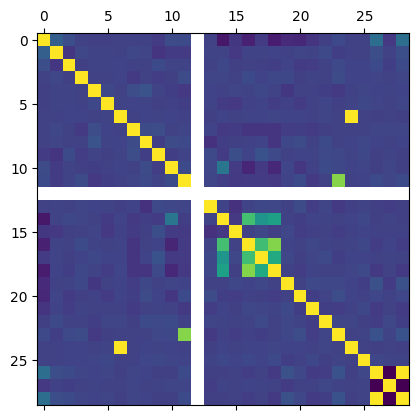

In [25]:
import matplotlib.pyplot as plt

plt.matshow(df1.corr())
plt.show()

## Training models

### Logistic regression

Implementations of the model Logistic Linear Regression

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn import preprocessing
from sklearn.metrics import roc_curve


# Step 1: Prepare data for training
def prepare_data_for_training(df1):

    # Define the features and the target
    X = df1.drop(columns=['Attrition'])  # 'Attrition_Yes' is the target
    y = df1['Attrition']

    # Divide the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = preprocessing.StandardScaler().fit(X_train) # scaling our datas
    X_train = scaler.transform(X_train)

    scaler = preprocessing.StandardScaler().fit(X_test) # scaling our datas
    X_test = scaler.transform(X_test)


    return X_train, X_test, y_train, y_test

# Step 2: Train and evaluate the model
def train_Logistic_regression(X_train, X_test, y_train, y_test):
    # Initialize the model
    model = LogisticRegression(max_iter=100000, random_state=42)

    # Train the model
    model.fit(X_train, y_train)


    return model

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)

def Evaluate_Logistic_regression(model, X_train, X_test, y_train, y_test):
      # Make predictions
    y_pred = model.predict(X_test)

    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cross_val_results = cross_val_score(model, X_train, y_train, cv=kf)
    print(f"Cross-validation results: \n\t {cross_val_results}")

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("\nAccuracy :", accuracy)
    print("\nClassification Report:\n", report)

    fpr, tpr, thresholds = roc_curve(y_train, y_pred)
    plt.figure(figsize=(8, 6))
    plot_roc_curve(fpr, tpr)
    plt.show()




# Step 3: Load and prepare the data, train and evaluate the model

# Prepare the data for training
X_train, X_test, y_train, y_test = prepare_data_for_training(df1)

# Train and evaluate the model
trained_model = train_Logistic_regression(X_train, X_test, y_train, y_test)

Evaluate_Logistic_regression(trained_model, X_train, X_test, y_train, y_test)





Cross-validation results: 
	 [0.84419263 0.85694051 0.8470255  0.86666667 0.85531915]

Accuracy : 0.8503401360544217

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       741
           1       0.60      0.19      0.29       141

    accuracy                           0.85       882
   macro avg       0.73      0.58      0.60       882
weighted avg       0.82      0.85      0.82       882



ValueError: Found input variables with inconsistent numbers of samples: [3528, 882]

### Random Forest Method